Mic A Audio:
Mic B Audio (Delayed):


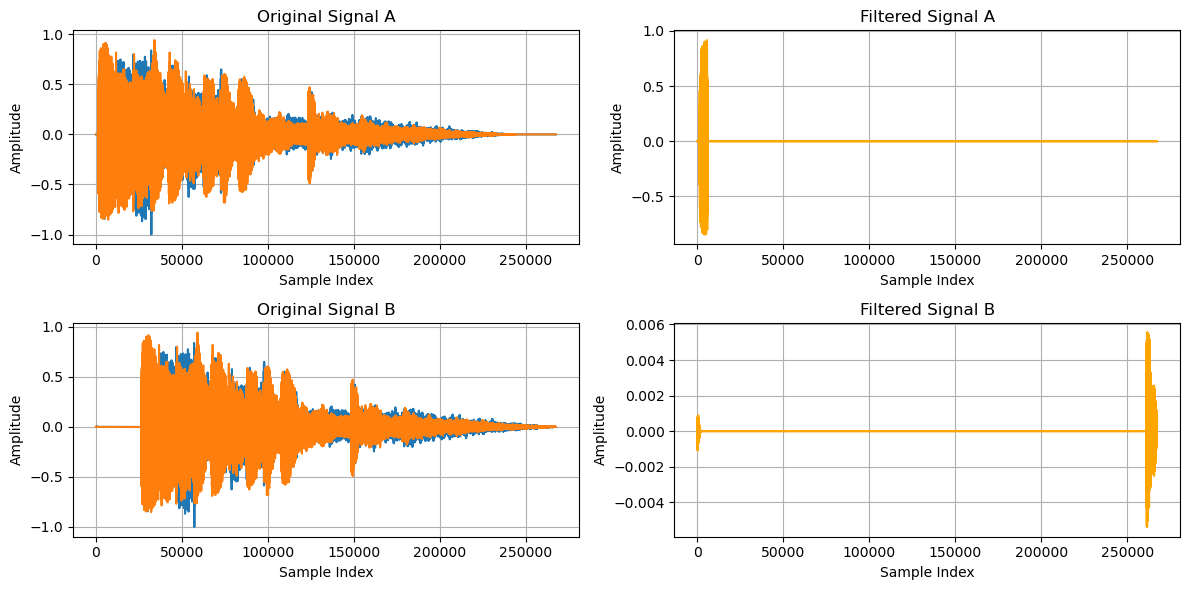

Filtered Mic A Audio:
Filtered Mic B Audio:
Estimated time shift (samples): 593158
Estimated time shift: 13.450295 seconds


ValueError: operands could not be broadcast together with shapes (267264,2) (267264,) 

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import correlate
from IPython.display import Audio

# Load the audio file
folder_path = r'Bird_sound'
filename = "piano.wav"
file_path = os.path.join(folder_path, filename)

SR, z = wavfile.read(file_path)

# Play audio
# Audio(z, rate=SR) 

# Normalised Audio
z = z / np.max(np.abs(z))
signal_A = z

# Delay between microphones
delay_samples = 50000  
signal_B = np.roll(z, delay_samples)

# Unshifted Audio
print("Mic A Audio:")
# Audio(signal_A, rate=SR)
# display(Audio(signal_A, rate=SR))

print("Mic B Audio (Delayed):")
# Audio(signal_B, rate=SR)
# display(Audio(signal_B, rate=SR))

# FFT Calculation
fft_A = fft(signal_A)
fft_B = fft(signal_B)

# Apply low-pass filter
cutoff_freq = 1000  # Cutoff frequency in Hz
frequencies = fftfreq(len(signal_A), d=1/SR)  # Frequency bins

# Create a mask for the low-pass filter
lp_filter = np.abs(frequencies) <= cutoff_freq

# Apply the filter to both FFTs
filtered_fft_A = fft_A * lp_filter[:,None]
filtered_fft_B = fft_B * lp_filter[:,None]

# Inverse FFT to get back the filtered signals
filtered_signal_A = ifft(filtered_fft_A).real
filtered_signal_B = ifft(filtered_fft_B).real

# Phase difference between microphone A & B
phase_A = np.angle(filtered_fft_A)
phase_B = np.angle(filtered_fft_B)
phase_diff = phase_B - phase_A

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

# Original Signal A
plt.subplot(2, 2, 1)
plt.plot(signal_A, label="Original Signal A")
plt.title("Original Signal A")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Filtered Signal A
plt.subplot(2, 2, 2)
plt.plot(filtered_signal_A, label="Filtered Signal A", color="orange")
plt.title("Filtered Signal A")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Original Signal B
plt.subplot(2, 2, 3)
plt.plot(signal_B, label="Original Signal B")
plt.title("Original Signal B")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Filtered Signal B
plt.subplot(2, 2, 4)
plt.plot(filtered_signal_B, label="Filtered Signal B", color="orange")
plt.title("Filtered Signal B")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# Play the filtered signals
print("Filtered Mic A Audio:")
# Audio(filtered_signal_A, rate=SR)
# display(Audio(filtered_signal_A, rate=SR))

print("Filtered Mic B Audio:")
# Audio(filtered_signal_B, rate=SR)
# display(Audio(filtered_signal_B, rate=SR))



# Crosscorrelation - similarities between A & B
cross_corr = correlate(signal_A, signal_B)
time_shift = np.argmax(cross_corr) - len(signal_A) // 2

# Estimated Phase shift  
print(f"Estimated time shift (samples): {time_shift}")

time_shift_seconds = time_shift / SR
print(f"Estimated time shift: {time_shift_seconds:.6f} seconds")

# Adjusted Audio B 
fft_B_corrected = fft_B * np.exp(-1j * 2 * np.pi * time_shift * np.arange(len(signal_A)) / len(signal_A))
signal_B_corrected = np.real(ifft(fft_B_corrected))
print("Mic B Audio (Phase Aligned):")
# Audio(signal_B_corrected, rate=SR)
# display(Audio(signal_B_corrected, rate=SR)

# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Microphone A Signal")
plt.plot(signal_A[:2000])

plt.subplot(3, 1, 2)
plt.title("Microphone B Signal (Delayed)")
plt.plot(signal_B[:2000])

plt.subplot(3, 1, 3)
plt.title("Microphone B Signal (Phase Aligned)")
plt.plot(signal_B_corrected[:2000])
plt.tight_layout()
plt.show()